Some useful links:
    * Tutorial for python: https://docs.python.org/3/tutorial/
    * Documentation for Jupyter Notebooks: https://jupyter-notebook.readthedocs.io/en/stable/
    * NumPy package: https://numpy.org/devdocs/user/quickstart.html
    * Matplotlib package: https://matplotlib.org/tutorials/index.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Example 1: Mammal's heart rate (y) vs mass (x)

In [2]:
x = [.003, .006, .017, .103, .117, .252, .437, 1.34, 2.7 ,22, 33 ,50 ,100 ,405,500, 2500]
y = [782 ,588, 500, 347, 300, 352, 269 ,251, 187, 100, 81, 75, 70, 45, 50 ,37];

If there is a power law, i.e. $ y = A x^r $, then there will be a linear relation between $\log x$ and $\log y$:
$$ \log y = \log A + r \log x .$$
When $x$ and $y$ are both plot in logarithm scales, the pattern is clear:

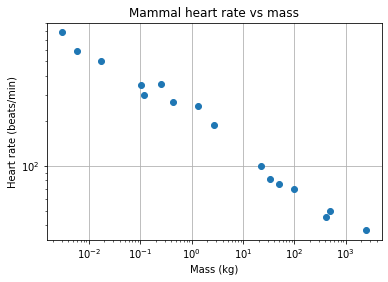

In [3]:
plt.loglog(x,y,'o')
plt.xlabel('Mass (kg)')
plt.ylabel('Heart rate (beats/min)')
plt.title('Mammal heart rate vs mass')
plt.grid()
plt.show()

To get the coefficients ($A$ and $r$), we do a linear regression for $\log y$ vs $\log y$ using least squares. 
* The first approach is solving the normal equation (Homework Q2) directly using NumPy linear algebra package, and we get the parameter $m$ as the slope (which is the power $r$) and $c$ as the y-intercept. The power is first output below, roughly $-\frac 14$, which contradicts the Kleibler's law ($-\frac 13$).

Recap -- how to fit a model $y = mx+c$:
 
 * First, create a matrix \begin{equation}X = \begin{bmatrix} x_1 & x_2 & \cdots & x_{N-1} & x_N \\ 1 & 1 & \cdots & 1 & 1\end{bmatrix}^T\end{equation}:

In [4]:
X = np.vstack((np.log(x),np.ones(len(x)))).T

* Then we solve the normal equation: 
    $$
    [m,c]^T = (X^TX)^{-1}(X^T y),\quad \text{ where }m \text{ is the slope and }c \text{ is the $y$-intercept}.
    $$

In [5]:
m,c = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(np.log(y)))
m,c

(-0.23083782275920414, 5.3334269549465025)

* The second approach is using the NumPy polyfit function with degree $1$, and the result is consistent:

In [6]:
m,c = np.polyfit(np.log(x),np.log(y),1)
m,c

(-0.23083782275920417, 5.3334269549465025)

To visualize how well we are doing so far, we plot the fitted model on the same figure as the original data:

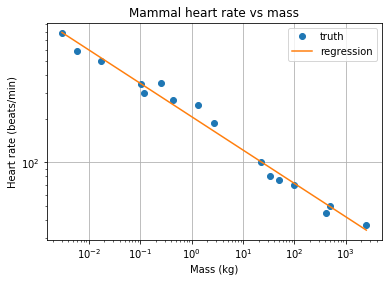

In [7]:
yfit = np.exp( m*np.log(x) + c ) # or yfit = np.polyval([m,c],np.log(x))

plt.loglog(x,y,'o',label = 'truth')
plt.loglog(x,yfit,label = 'regression')
plt.xlabel('Mass (kg)')
plt.ylabel('Heart rate (beats/min)')
plt.title('Mammal heart rate vs mass')
plt.grid()
plt.legend()
plt.show()

What if we fit a quadratic curve using least squares? In this case, it is not necessary, and we will get a really small quadratic coefficient here ($q \approx -0.0022$):

In [8]:
X2 = np.vstack(( np.power(np.log(x),2), np.log(x),np.ones(len(x)))).T
q,m,c = np.linalg.inv(X2.T.dot(X2)).dot(X2.T.dot(np.log(y))) # Or just q,m,c = np.polyfit(np.log(x),np.log(y),2)
q,m,c

(-0.0022694671345301343, -0.22680233216413975, 5.369992576621945)

Compare the new model with the data/previous model, it seems that the linear model (i.e. power law for $y$ vs $x$, the orange curve below) already works great, and including the quadratic feature (green curve below) does not pay much.

To show the contradiction with the theory, we might add one more curve (yellow in the figure below) with $-\frac 13$ power law, which obviously has a totally different slope and inconsistency with the data:

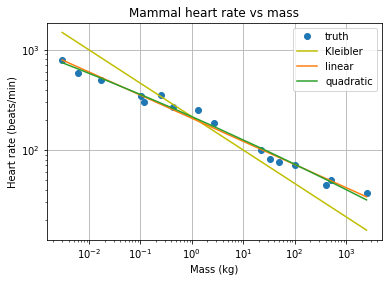

In [9]:
ytheory = np.exp( np.polyval( [-1/3,c],np.log(x) )  ) # Theory
yfit2 = np.exp ( np.polyval([q,m,c],np.log(x))  )
plt.loglog(x,y,'o',label = 'truth')
plt.loglog(x,ytheory,'y',label = 'Kleibler')
plt.loglog(x,yfit,label = 'linear')
plt.loglog(x,yfit2,label = 'quadratic')
plt.xlabel('Mass (kg)')
plt.ylabel('Heart rate (beats/min)')
plt.title('Mammal heart rate vs mass')
plt.grid()
plt.legend()
plt.show()

Example 2: estimate the power for Zipf's law.
In this example, there are $18855$ data points, and we can use some load functions to read them from a downloaded file, for instance, 'words.txt' in the same directory. The loglog plot indicates a clear power law:

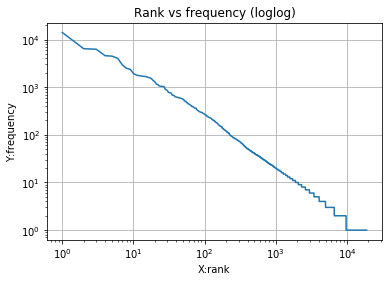

In [10]:
y = np.loadtxt('words.txt')
x = np.arange(1,len(y)+1,1)
plt.loglog(x,y)
plt.xlabel('X:rank')
plt.ylabel('Y:frequency')
plt.title('Rank vs frequency (loglog)')
plt.grid()
plt.show()
#plt.legend()

The power can also be estimated from linear regression of $\log (y)$ vs $\log (x)$. When visualized, clearly there is a consistency between the best fit and the data.

In [11]:
m,c = np.polyfit(np.log(x),np.log(y),1)
m,c

(-1.1132751814736137, 10.680004548586352)

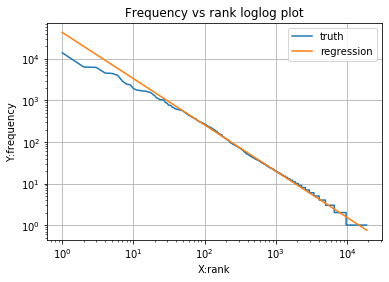

In [12]:
yfit = np.exp( np.polyval([m,c],np.log(x)))
plt.loglog(x,y,label = 'truth')
plt.loglog(x,yfit,label = 'regression')
plt.xlabel('X:rank')
plt.ylabel('Y:frequency')
plt.title('Frequency vs rank loglog plot')
plt.grid()
plt.legend()
plt.show()